# Concrete Crack Classification (Deep Neural Network)

<h2>Objective</h2><ul><li> How to download and pre-process the Concrete dataset.</li></ul> <p>Crack detection has vital importance for structural health monitoring and inspection. We would like to train a network to detect Cracks, we will denote the images that contain cracks as positive and images with no cracks as negative. In this lab you are going to have to download the data and study the dataset. There are two questions in this lab, including listing the path to some of the image files as well as plotting a few images. Remember the results as you will be quizzed on them. </p>


In [24]:
from PIL import  Image
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import os
import pandas as pd 
import numpy as np 
import glob
import skillsnetwork
import torchvision.transforms as transforms


In [4]:
def show_data(data_sample, shape = (28, 28)):
    plt.imshow(data_sample[0].numpy().reshape(shape), cmap='gray')
    plt.title('y = ' + data_sample[1])

In this section, you are going to download the data from IBM object storage using **skillsnetwork.prepare** command. <b>skillsnetwork.prepare</b> is a command that's used to download a zip file, unzip it and store it in a specified directory. Locally we store the data in the directory  **/resources/data**. 


In [6]:
await skillsnetwork.prepare("https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0321EN/data/images/concrete_crack_images_for_classification.zip", path = "/Users/jihadgarti/Desktop/Big data", overwrite=True)

  0%|          | 0/40000 [00:00<?, ?it/s]

Saved to '../../Big data'


# Examine files

In this section we are going to get a list of the negative image files, then plot them.

In [7]:
directory = "/Users/jihadgarti/Desktop/Big data"

In [8]:
negative = 'Negative'

In [9]:
negative_file_path = os.path.join(directory,negative)

We need each the path of each image, we can find the all the file in the directory  <code>negative_file_path</code> using the function <code>os.listdir</code>, the result is a list. We print out the first three elements of the list.


In [11]:
os.listdir(negative_file_path)[0:3]

['14147.jpg', '04354.jpg', '13628.jpg']

We need to get the full path of the image so we join them as above.

In [12]:
[os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path)][0:3]

['/Users/jihadgarti/Desktop/Big data/Negative/14147.jpg',
 '/Users/jihadgarti/Desktop/Big data/Negative/04354.jpg',
 '/Users/jihadgarti/Desktop/Big data/Negative/13628.jpg']

In [13]:
print("test.jpg".endswith(".jpg"))
print("test.mpg".endswith(".jpg"))

True
False


In [15]:
negative_files = [os.path.join(negative_file_path,file) for file in os.listdir(negative_file_path) if file.endswith("jpg")]
negative_files.sort()
negative_files[0:3]

['/Users/jihadgarti/Desktop/Big data/Negative/00001.jpg',
 '/Users/jihadgarti/Desktop/Big data/Negative/00002.jpg',
 '/Users/jihadgarti/Desktop/Big data/Negative/00003.jpg']

In [16]:
positive = "Positive"

In [17]:
positive_file_path = os.path.join(directory,positive)
print(positive_file_path)

/Users/jihadgarti/Desktop/Big data/Positive


In [19]:
positive_files = [os.path.join(positive_file_path,file) for file in os.listdir(positive_file_path) if file.endswith("jpg")]
positive_files.sort()
positive_files[0:3]

['/Users/jihadgarti/Desktop/Big data/Positive/00001.jpg',
 '/Users/jihadgarti/Desktop/Big data/Positive/00002.jpg',
 '/Users/jihadgarti/Desktop/Big data/Positive/00003.jpg']

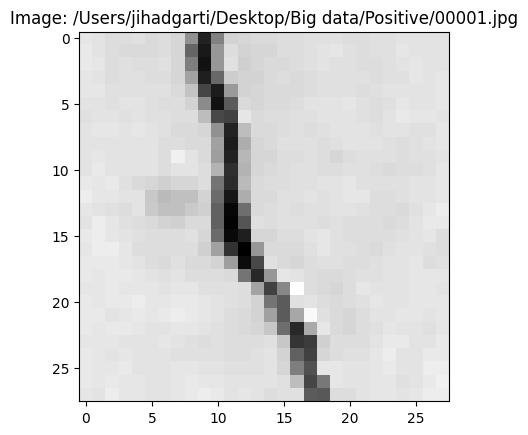

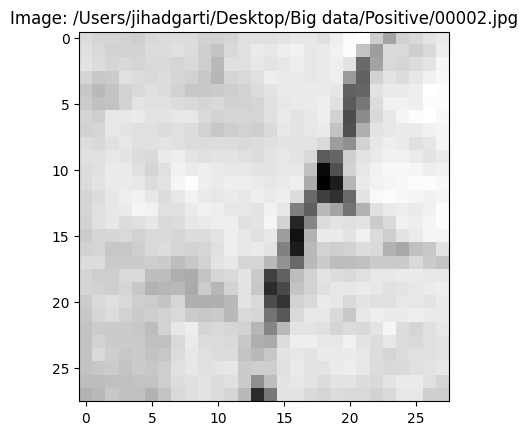

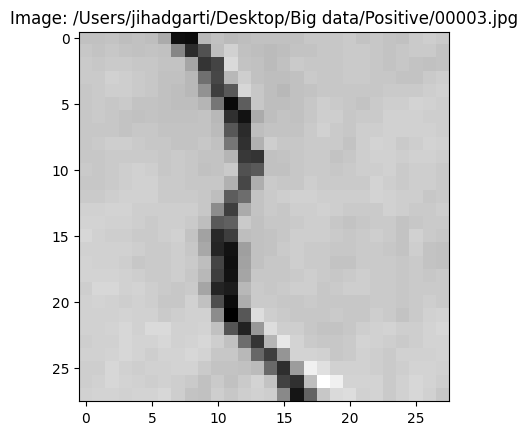

In [25]:
def show_data(image_path, shape=(28, 28)):
    image = Image.open(image_path).convert('L')  # Convert to grayscale
    transform = transforms.Compose([transforms.Resize(shape), transforms.ToTensor()])
    image_tensor = transform(image)
    plt.imshow(image_tensor.numpy().reshape(shape), cmap='gray')
    plt.title('Image: ' + image_path)
    plt.show()
    
for i in range(3):
    show_data(positive_files[i])